In [1]:
import pandas as pd
%matplotlib inline

In [2]:
anaphora = pd.read_csv('data_for_evaluation.csv', encoding='cp1251')
anaphora = anaphora.drop('Unnamed: 0', 1)
anaphora.head(10)

,ID,answ,c_count,c_gend,c_len,c_pow,dif_cand_disc,dif_disc_both,dif_minus5,dif_plus5,dist,dist_in_char,is_punct,same_count,same_gend,t_count,t_gend,target
0,1.0,0.0,p,f,4.0,N,0.663413,0.992907,0.874818,0.801686,1.0,5.0,1.0,1.0,0.0,p,-,они
1,1.0,0.0,p,m,10.0,A,0.577254,0.971050,0.736436,0.191687,2.0,15.0,1.0,1.0,0.0,p,-,они
2,1.0,1.0,p,m,6.0,N,0.580460,0.944659,0.543260,0.299463,3.0,21.0,1.0,1.0,0.0,p,-,они
3,1.0,0.0,p,m,5.0,A,0.627596,0.914894,0.467015,0.253229,4.0,26.0,1.0,1.0,0.0,p,-,они
4,1.0,0.0,s,f,4.0,N,0.338136,0.905800,0.571886,0.331605,5.0,31.0,1.0,0.0,0.0,p,-,они
5,1.0,0.0,-,-,6.0,S,0.000000,0.904044,0.646364,0.346401,6.0,37.0,1.0,0.0,0.0,p,-,они
6,1.0,0.0,s,m,7.0,N,0.689964,0.869259,0.664812,0.357136,7.0,45.0,1.0,0.0,0.0,p,-,они
7,1.0,0.0,-,-,3.0,S,0.000000,0.869259,0.664125,0.363211,8.0,48.0,1.0,0.0,0.0,p,-,они
8,1.0,0.0,-,-,9.0,V,0.632091,0.828150,0.627526,0.385936,9.0,57.0,1.0,0.0,0.0,p,-,они
9,1.0,0.0,-,-,2.0,Q,0.000000,0.828150,0.627526,0.425611,10.0,59.0,1.0,0.0,0.0,p,-,они


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns

In [4]:
le_count = LabelEncoder()
le_gend = LabelEncoder()
le_c_pos = LabelEncoder()
le_target = LabelEncoder()
anaphora['c_count'] = le_count.fit_transform(anaphora['c_count'])
anaphora['c_gend'] = le_gend.fit_transform(anaphora['c_gend'])
anaphora['t_count'] = le_count.fit_transform(anaphora['t_count'])
anaphora['t_gend'] = le_gend.fit_transform(anaphora['t_gend'])
anaphora['c_pow'] = le_c_pos.fit_transform(anaphora['c_pow'])
anaphora['target'] = le_target.fit_transform(anaphora['target'])
print(anaphora.columns)
anaphora

Index(['ID', 'answ', 'c_count', 'c_gend', 'c_len', 'c_pow', 'dif_cand_disc',
       'dif_disc_both', 'dif_minus5', 'dif_plus5', 'dist', 'dist_in_char',
       'is_punct', 'same_count', 'same_gend', 't_count', 't_gend', 'target'],
      dtype='object')


,ID,answ,c_count,c_gend,c_len,c_pow,dif_cand_disc,dif_disc_both,dif_minus5,dif_plus5,dist,dist_in_char,is_punct,same_count,same_gend,t_count,t_gend,target
0,1.0,0.0,1,2,4.0,5,0.663413,0.992907,0.874818,0.801686,1.0,5.0,1.0,1.0,0.0,1,0,6
1,1.0,0.0,1,3,10.0,1,0.577254,0.971050,0.736436,0.191687,2.0,15.0,1.0,1.0,0.0,1,0,6
2,1.0,1.0,1,3,6.0,5,0.580460,0.944659,0.543260,0.299463,3.0,21.0,1.0,1.0,0.0,1,0,6
3,1.0,0.0,1,3,5.0,1,0.627596,0.914894,0.467015,0.253229,4.0,26.0,1.0,1.0,0.0,1,0,6
4,1.0,0.0,2,2,4.0,5,0.338136,0.905800,0.571886,0.331605,5.0,31.0,1.0,0.0,0.0,1,0,6
5,1.0,0.0,0,0,6.0,9,0.000000,0.904044,0.646364,0.346401,6.0,37.0,1.0,0.0,0.0,1,0,6
6,1.0,0.0,2,3,7.0,5,0.689964,0.869259,0.664812,0.357136,7.0,45.0,1.0,0.0,0.0,1,0,6
7,1.0,0.0,0,0,3.0,9,0.000000,0.869259,0.664125,0.363211,8.0,48.0,1.0,0.0,0.0,1,0,6
8,1.0,0.0,0,0,9.0,10,0.632091,0.828150,0.627526,0.385936,9.0,57.0,1.0,0.0,0.0,1,0,6
9,1.0,0.0,0,0,2.0,7,0.000000,0.828150,0.627526,0.425611,10.0,59.0,1.0,0.0,0.0,1,0,6


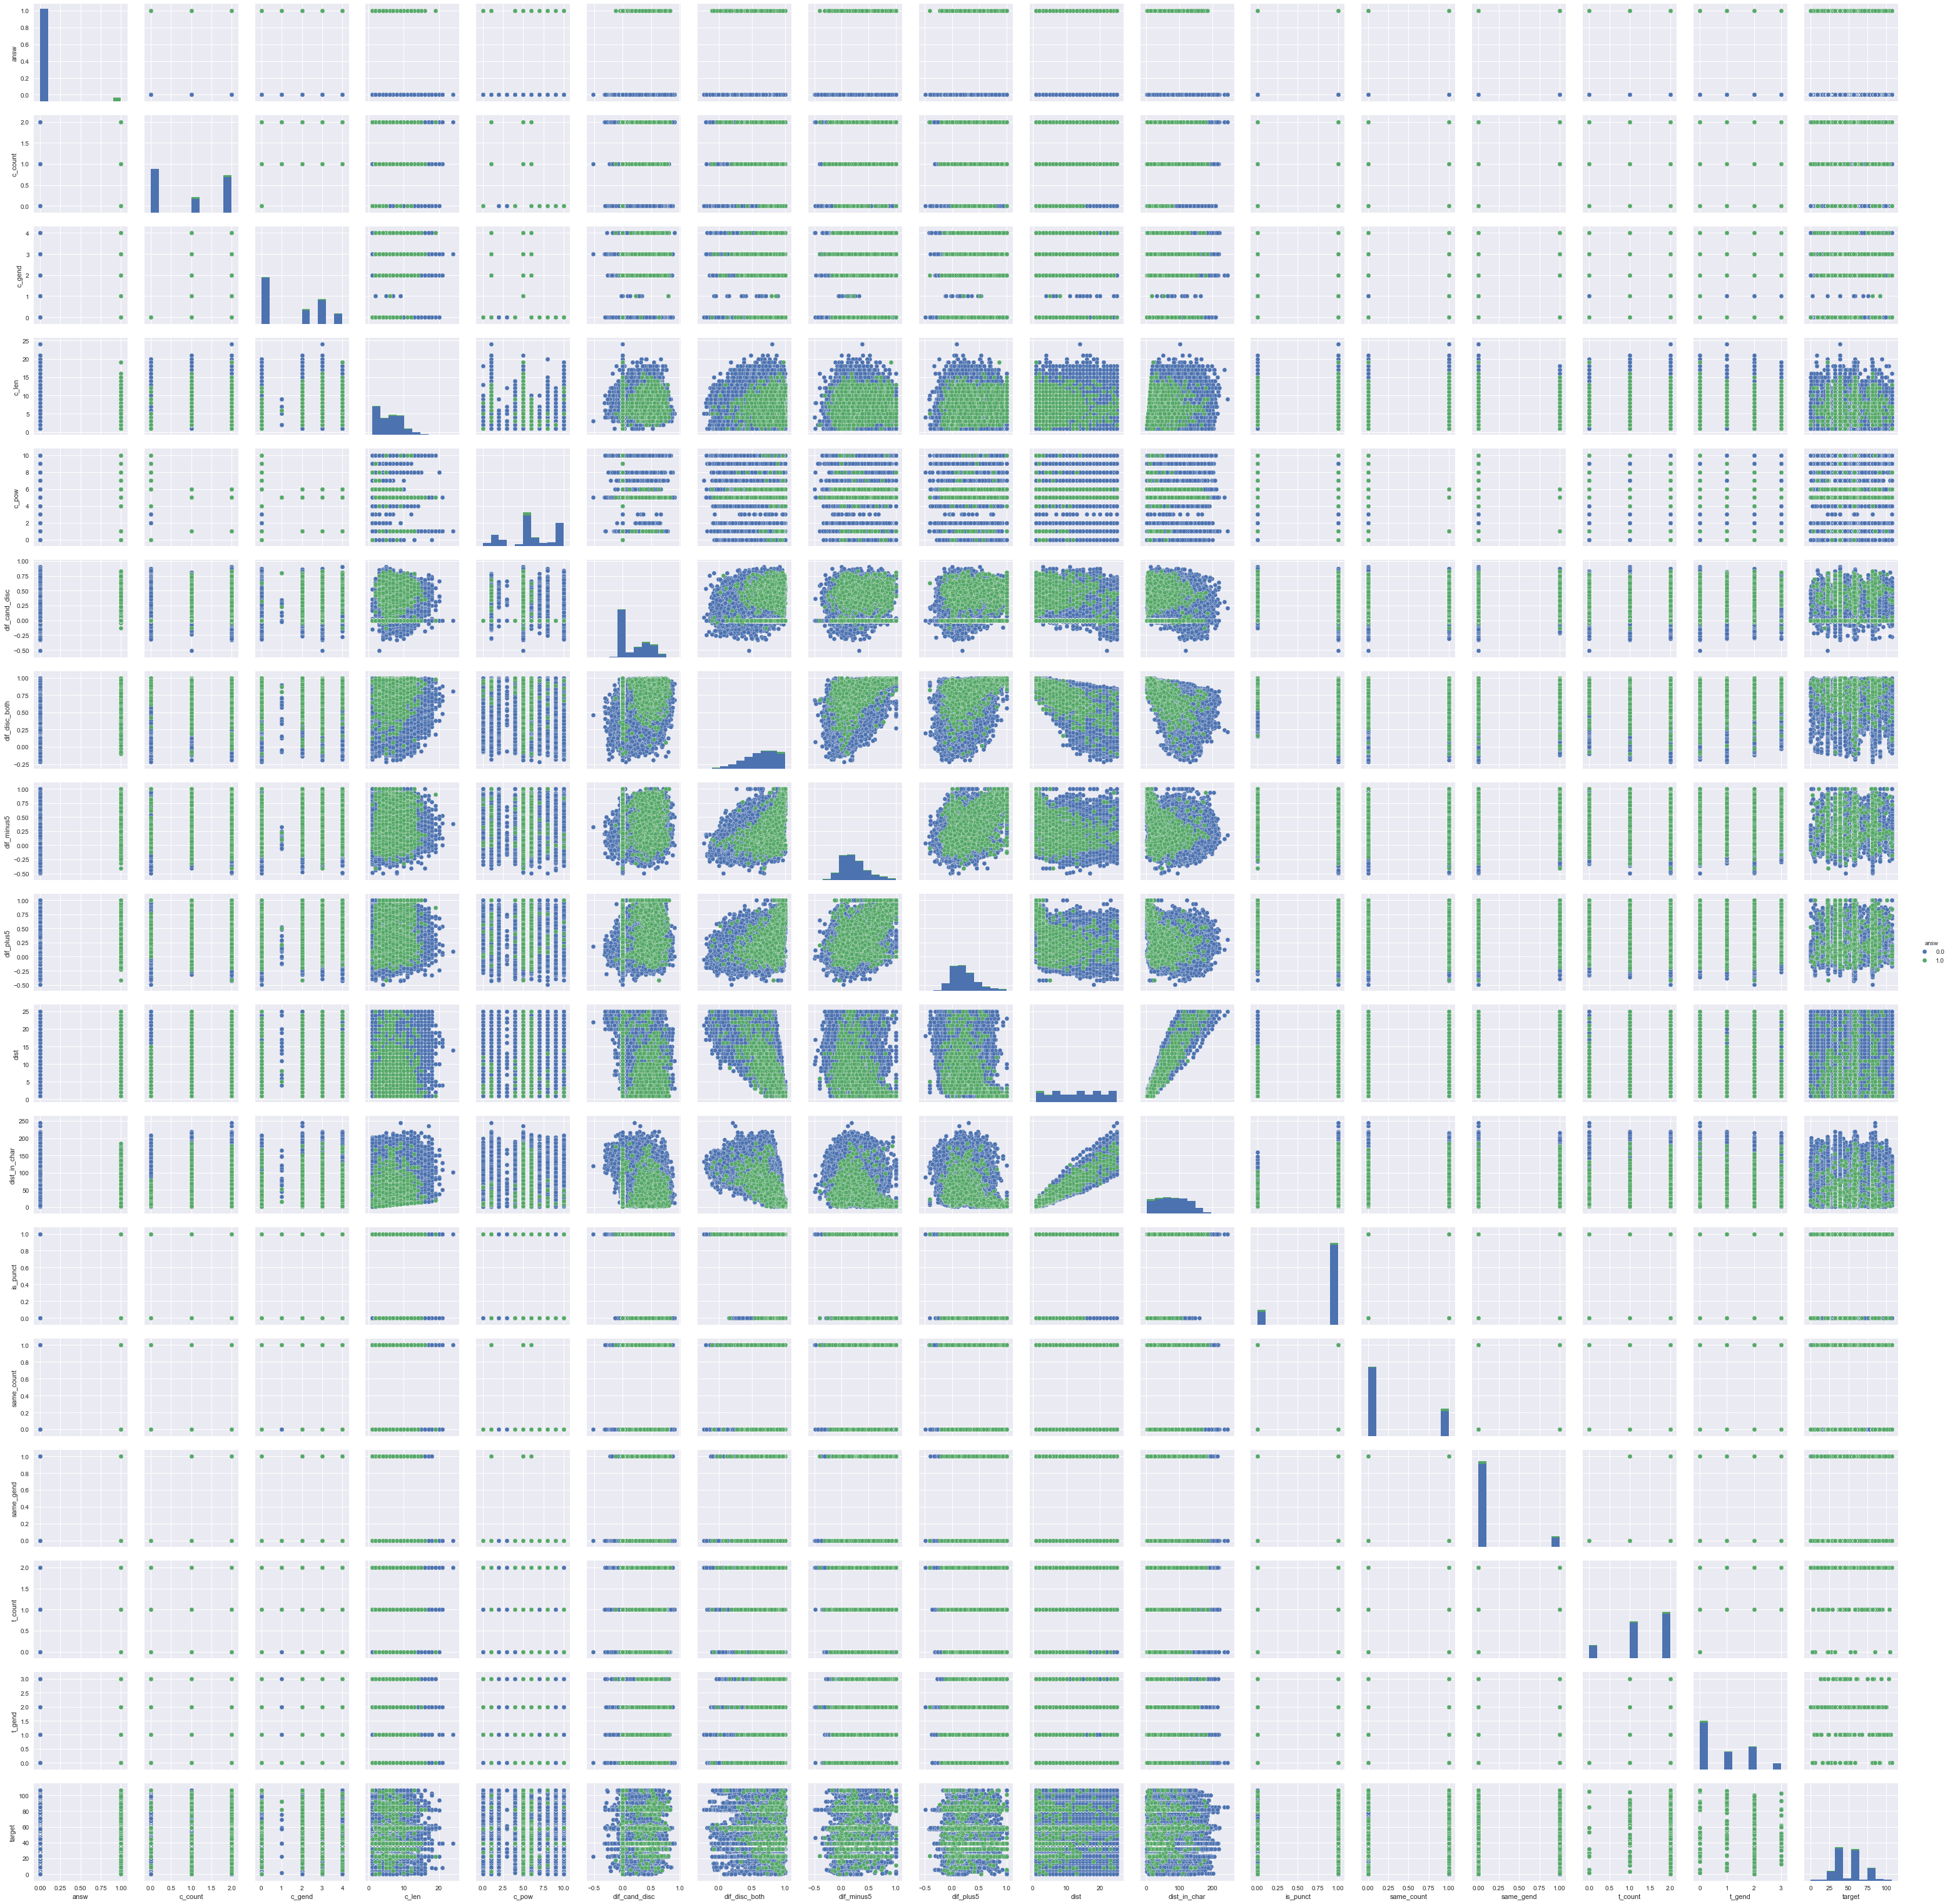

In [6]:
sns.pairplot(anaphora, hue="answ")
sns.plt.show()

In [5]:
anaphora = anaphora.sample(frac=1).reset_index(drop=True)#.drop('index',1)
anaphora.head()

,ID,answ,c_count,c_gend,c_len,c_pow,dif_cand_disc,dif_disc_both,dif_minus5,dif_plus5,dist,dist_in_char,is_punct,same_count,same_gend,t_count,t_gend,target
0,1129.0,1.0,2,2,6.0,5,0.251614,0.935776,-0.165569,0.697561,2.0,9.0,1.0,1.0,1.0,2,1,5
1,837.0,0.0,2,3,7.0,5,0.699268,0.658149,0.249689,0.000000,18.0,94.0,1.0,1.0,0.0,2,1,3
2,893.0,0.0,2,2,5.0,5,0.562562,0.491362,0.271048,0.027194,15.0,89.0,1.0,1.0,0.0,2,2,3
3,352.0,0.0,1,2,5.0,5,0.373440,0.330025,0.084449,0.319668,25.0,152.0,1.0,1.0,0.0,1,0,6
4,255.0,0.0,2,4,8.0,1,0.377315,0.508019,0.007956,0.253112,17.0,125.0,1.0,0.0,0.0,1,0,6


In [6]:
import numpy as np

In [7]:
for_work = anaphora.loc[:25999,:]
for_evaluation = anaphora.loc[26000:,:]

for_simp = for_work#.loc[:10000,:]
train, test = train_test_split(for_simp, test_size=0.3, random_state=29)
features = ['c_count', 'c_gend', 'c_len', 'c_pow', 'dif_cand_disc',
       'dif_disc_both', 'dif_minus5', 'dif_plus5', 'dist', 'dist_in_char',
       'is_punct', 'same_count', 'same_gend', 't_count', 't_gend', 'target']
anaphora.columns
#auc = accuracy_score()

Index(['ID', 'answ', 'c_count', 'c_gend', 'c_len', 'c_pow', 'dif_cand_disc',
       'dif_disc_both', 'dif_minus5', 'dif_plus5', 'dist', 'dist_in_char',
       'is_punct', 'same_count', 'same_gend', 't_count', 't_gend', 'target'],
      dtype='object')

In [8]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs=-1)#,class_weight='balanced')
param_grid = {'class_weight':[{1:5, 0:1},'balanced', {1:3, 0:1}], 'n_estimators':[5,10, 20, 50], 
              'max_features':[None, 'log2', 'auto'], 'max_depth':[10,50,None], 'min_samples_split':[2,5,10,20],
             'random_state':[0,10,20,50]}


clf = GridSearchCV(rf, param_grid, n_jobs=-1, pre_dispatch='2*n_jobs', return_train_score=True)
#print(len(train[features]), len(train['answ']))
clf.fit(train[features], train['answ'])
print(classification_report(test['answ'], clf.predict(test[features])))
print(clf.best_estimator_ )

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      8648
        1.0       0.72      0.32      0.45       352

avg / total       0.96      0.97      0.96      9000

RandomForestClassifier(bootstrap=True, class_weight={1: 3, 0: 1},
            criterion='gini', max_depth=50, max_features='log2',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [8]:
def print_importancies(coef, features):
    importances = {}
    for i in range(len(features)):
        importances[coef[i]] = features[i]

    for key in sorted(importances.keys(), reverse=True):
        print(str(key) + '  = importance of '+ importances[key])

In [9]:
rf_b = RandomForestClassifier(class_weight={1: 3, 0: 1},
            criterion='gini', max_depth=50, max_features='log2',
            min_samples_leaf=1, min_samples_split=5, n_estimators=50, n_jobs=-1, random_state=0)
rf_b.fit(train[features], train['answ'])
print(classification_report(test['answ'], rf_b.predict(test[features])))
print_importancies(rf_b.feature_importances_, features)

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98      7492
        1.0       0.76      0.32      0.46       308

avg / total       0.96      0.97      0.96      7800

0.145614813993  = importance of dist_in_char
0.108881482697  = importance of dist
0.0987138935873  = importance of dif_plus5
0.0931922974196  = importance of dif_disc_both
0.0799909774045  = importance of dif_minus5
0.0760641858056  = importance of dif_cand_disc
0.0687181646519  = importance of c_count
0.0653521941923  = importance of target
0.0650353719577  = importance of c_pow
0.0445263582111  = importance of same_count
0.0436663837549  = importance of c_len
0.0435382225988  = importance of c_gend
0.0225438678148  = importance of same_gend
0.0165626904804  = importance of t_count
0.0140097743914  = importance of t_gend
0.0135893210399  = importance of is_punct


In [11]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced'], 'random_state':[0, 10, 20],
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[3500]}
clf_1 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_1.fit(train[features], train['answ'])
print(classification_report(test['answ'], clf_1.predict(test[features])))
clf_1.best_estimator_

             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97      8648
        1.0       0.36      0.65      0.47       352

avg / total       0.96      0.94      0.95      9000



LogisticRegression(C=0.10000000000000001, class_weight={1: 5, 0: 1},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=3500, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=10, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [10]:
lr_b_w3 = LogisticRegression(C=0.1, class_weight={1: 5, 0: 1},
          max_iter=3500, multi_class='ovr', n_jobs=-1, penalty='l2',
          random_state=10, solver='sag')
lr_b_w3.fit(train[features], train['answ'])
print(classification_report(test['answ'], lr_b_w3.predict(test[features])))
print_importancies(lr_b_w3.coef_[0], features)

             precision    recall  f1-score   support

        0.0       0.98      0.95      0.97      7492
        1.0       0.35      0.64      0.45       308

avg / total       0.96      0.94      0.95      7800

1.97710908809  = importance of same_count
1.37617567047  = importance of same_gend
0.916653359347  = importance of dif_cand_disc
0.399799470823  = importance of c_count
0.379674056362  = importance of dif_plus5
0.294668311417  = importance of c_gend
0.205753230352  = importance of c_pow
0.105112534768  = importance of target
0.0306386897535  = importance of dif_minus5
0.0216825370501  = importance of c_len
-0.0239806547263  = importance of dist_in_char
-0.0710697508702  = importance of dist
-0.178186413303  = importance of is_punct
-0.212391085383  = importance of t_gend
-0.243269222376  = importance of dif_disc_both
-1.08734686947  = importance of t_count


ad = AdaBoostClassifier()
ad.fit(train[features], train['answ'])
print(classification_report(test['answ'], ad.predict(test[features])))

In [11]:
correct = for_work.loc[anaphora['answ']==1]
incorrect = for_work.loc[anaphora['answ']==0]
sample_data = pd.concat([correct, incorrect.sample(2*len(correct))]).sample(frac=1).reset_index(drop=True)
print(len(correct), len(incorrect))
samp_train, samp_test = train_test_split(sample_data, test_size=0.2, random_state=17)
len(sample_data)

1051 24949


3153

In [12]:
from sklearn.model_selection import GridSearchCV

In [15]:
rf = RandomForestClassifier(n_jobs=-1)#,class_weight='balanced')
param_grid = {'class_weight':[{1:5, 0:1},'balanced', {1:3, 0:1}], 'n_estimators':[20, 25, 35, 45, 50], 'random_state':[0, 10, 20],
              'max_features':[None, 'log2', 'auto'], 'max_depth':[10,50,None], 'min_samples_split':[2,5,10,20]}


clf = GridSearchCV(rf, param_grid, n_jobs=-1, pre_dispatch='2*n_jobs', return_train_score=True)
#print(len(train[features]), len(train['answ']))
clf.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], clf.predict(samp_test[features])))
print(clf.best_estimator_ )

             precision    recall  f1-score   support

        0.0       0.92      0.91      0.92       474
        1.0       0.83      0.85      0.84       243

avg / total       0.89      0.89      0.89       717

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=50, max_features='log2',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [13]:
rf_b_bal = RandomForestClassifier(class_weight='balanced',
            criterion='gini', max_depth=50, max_features='log2',
            min_samples_leaf=1, min_samples_split=5, n_estimators=35, n_jobs=-1, random_state=0)
rf_b_bal.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], rf_b_bal.predict(samp_test[features])))
print_importancies(rf_b_bal.feature_importances_, features)

             precision    recall  f1-score   support

        0.0       0.92      0.91      0.92       429
        1.0       0.81      0.84      0.83       202

avg / total       0.89      0.89      0.89       631

0.164372491831  = importance of dist_in_char
0.148074313709  = importance of dist
0.134210094758  = importance of c_count
0.0947215581619  = importance of dif_disc_both
0.0793474150454  = importance of c_pow
0.0733710216854  = importance of dif_plus5
0.0623623744071  = importance of dif_minus5
0.0549885191964  = importance of target
0.0400276161462  = importance of dif_cand_disc
0.0369057887994  = importance of same_count
0.035986241796  = importance of c_len
0.0311192209927  = importance of c_gend
0.0125570185224  = importance of same_gend
0.0117017356705  = importance of t_count
0.0104172561864  = importance of is_punct
0.00983733309179  = importance of t_gend


In [18]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced', {1:3, 0:1}],  'random_state':[0, 10, 20],
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[2500]}
clf_1 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_1.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], clf_1.predict(samp_test[features])))
clf_1.best_estimator_

             precision    recall  f1-score   support

        0.0       0.93      0.82      0.87       474
        1.0       0.72      0.88      0.79       243

avg / total       0.86      0.84      0.85       717



LogisticRegression(C=0.80000000000000004, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2500,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [14]:
lr_b_bal = LogisticRegression(C=0.8, class_weight='balanced',
          max_iter=2500, multi_class='ovr', n_jobs=-1, penalty='l2',
          random_state=0, solver='sag')
lr_b_bal.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], lr_b_bal.predict(samp_test[features])))
print_importancies(lr_b_bal.coef_[0], features)

             precision    recall  f1-score   support

        0.0       0.94      0.83      0.88       429
        1.0       0.71      0.89      0.79       202

avg / total       0.87      0.85      0.85       631

1.66772131519  = importance of same_count
1.37673642737  = importance of same_gend
0.403108271569  = importance of c_count
0.359062278054  = importance of dif_cand_disc
0.297871668887  = importance of c_gend
0.281912514217  = importance of dif_plus5
0.203208009339  = importance of target
0.156351434463  = importance of c_pow
-0.00602149834881  = importance of c_len
-0.015128394791  = importance of dist_in_char
-0.133072812511  = importance of dist
-0.154068238812  = importance of t_gend
-0.184404573433  = importance of dif_minus5
-0.25381341201  = importance of dif_disc_both
-0.258660574177  = importance of is_punct
-1.08562865533  = importance of t_count


In [15]:
print(classification_report(for_evaluation['answ'], rf_b_bal.predict(for_evaluation[features])))
accuracy_score(for_evaluation['answ'], rf_b_bal.predict(for_evaluation[features]))

             precision    recall  f1-score   support

        0.0       0.99      0.91      0.95      4643
        1.0       0.29      0.88      0.43       182

avg / total       0.97      0.91      0.93      4825



0.91336787564766841

In [16]:
print(classification_report(for_evaluation['answ'], lr_b_bal.predict(for_evaluation[features])))
accuracy_score(for_evaluation['answ'], lr_b_bal.predict(for_evaluation[features]))

             precision    recall  f1-score   support

        0.0       0.99      0.82      0.90      4643
        1.0       0.16      0.87      0.27       182

avg / total       0.96      0.82      0.88      4825



0.82383419689119175

In [17]:
sec_lvl_model_train = pd.DataFrame({'rf_1':rf_b_bal.predict(samp_train[features]), 'lr_1':lr_b_bal.predict(samp_train[features]),
                             'rf_2':rf_b.predict(samp_train[features]), 'lr_2':lr_b_w3.predict(samp_train[features]),
                             'answ':samp_train['answ']})

sec_lvl_model_eval = pd.DataFrame({'rf_1':rf_b_bal.predict(for_evaluation[features]), 'lr_1':lr_b_bal.predict(for_evaluation[features]),
                             'rf_2':rf_b.predict(for_evaluation[features]), 'lr_2':lr_b_w3.predict(for_evaluation[features]),
                             'answ':for_evaluation['answ']})

In [20]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced', {1:3, 0:1}], 
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[1500, 2000], 'random_state':np.arange(0, 50,10)}
clf_2 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_2.fit(sec_lvl_model_train[['rf_1', 'lr_1']], sec_lvl_model_train['answ'])
print(classification_report(sec_lvl_model_eval['answ'], clf_2.predict(sec_lvl_model_eval[['rf_1', 'lr_1']])))
clf_2.best_estimator_ 


             precision    recall  f1-score   support

        0.0       0.99      0.91      0.95      4643
        1.0       0.29      0.88      0.43       182

avg / total       0.97      0.91      0.93      4825



LogisticRegression(C=0.10000000000000001, class_weight={1: 5, 0: 1},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=1500, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=0, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [21]:
lr_2_lvl_1 = LogisticRegression(C=0.1, class_weight={1: 5, 0: 1}, max_iter=1500,
          n_jobs=-1, penalty='l2', random_state=0, solver='sag')
lr_2_lvl_1.fit(sec_lvl_model_train[['rf_1', 'lr_1']], sec_lvl_model_train['answ'])
print(classification_report(sec_lvl_model_eval['answ'], clf_2.predict(sec_lvl_model_eval[['rf_1', 'lr_1']])))

             precision    recall  f1-score   support

        0.0       0.99      0.91      0.95      4643
        1.0       0.29      0.88      0.43       182

avg / total       0.97      0.91      0.93      4825



In [22]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced', {1:3, 0:1}], 
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[1500, 2000], 'random_state':np.arange(0, 50,10)}
clf_2 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_2.fit(sec_lvl_model_train[['rf_2', 'lr_2']], sec_lvl_model_train['answ'])
print(classification_report(sec_lvl_model_eval['answ'], clf_2.predict(sec_lvl_model_eval[[ 'rf_2', 'lr_2']])))
clf_2.best_estimator_ 

             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97      4643
        1.0       0.37      0.68      0.48       182

avg / total       0.96      0.94      0.95      4825



LogisticRegression(C=0.10000000000000001, class_weight={1: 5, 0: 1},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=1500, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=0, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [23]:
lr_2_lvl_2 = LogisticRegression(C=0.1, class_weight={1:5, 0:1}, max_iter=1500,
          n_jobs=-1, penalty='l2', random_state=0, solver='sag')
lr_2_lvl_2.fit(sec_lvl_model_train[['rf_2', 'lr_2']], sec_lvl_model_train['answ'])
print(classification_report(sec_lvl_model_eval['answ'], lr_2_lvl_2.predict(sec_lvl_model_eval[['rf_2', 'lr_2']])))

             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97      4643
        1.0       0.37      0.68      0.48       182

avg / total       0.96      0.94      0.95      4825



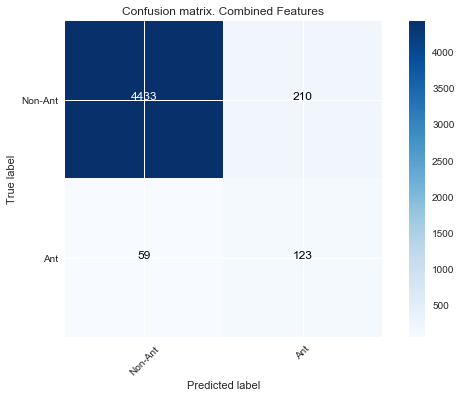

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
#import seaborn as sns

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

mat = confusion_matrix(sec_lvl_model_eval['answ'], lr_2_lvl_2.predict(sec_lvl_model_eval[['rf_2', 'lr_2']]))
plt.figure()
plot_confusion_matrix(mat, classes=['Non-Ant', 'Ant'],
                      title='Confusion matrix. Combined Features')
plt.show()

In [25]:
print_importancies(lr_2_lvl_2.coef_[0], ['rf_1', 'lr_1'])

4.17113642362  = importance of rf_1
2.36730934612  = importance of lr_1


corr_rf = 0
corr_lr = 0
corr_2_lvl = 0
llvv_2 = []
true_answ = []
count = 0
pp = False
for n, group in anaphora.groupby('ID'):
    
    g = group.reset_index(drop=True)
    #print(n, g)
    true_answ = true_answ + g['answ'].values.tolist()
    d = int(g.loc[g['answ']==1].index[0] )#- (count)*25)
    pred_1 = [a-b for a,b in rf_b_bal.predict_proba(g[features])]
    pred_2 = [a-b for a,b in lr_b_bal.predict_proba(g[features])]
    for_2_lvl = pd.DataFrame({'rf_2':rf_b_bal.predict(g[features]), 'lr_2':lr_b_bal.predict(g[features])})
    pred_2_lvl = [a-b for a,b in lr_2_lvl_2.predict_proba(for_2_lvl)]
    #print(pred_2_lvl)
    #print(min(mm), mm[d], lr_b_bal.predict_proba(group[features])[d])
    #print(d)
    count += 1
    if min(pred_1) == pred_1[d]:
        corr_rf += 1
    if min(pred_2) == pred_2[d]:
        corr_lr += 1
    if min(pred_2_lvl) == pred_2_lvl[d]:
        corr_2_lvl += 1
        llvv_2.append(1)
    else:
        llvv_2.append(0)
print('auc rf_b  ', float(corr_rf)/len(anaphora.groupby('ID')))
print('auc rf_b_bal  ', float(corr_lr)/len(anaphora.groupby('ID')))
print('auc rf_b_bal  ', float(corr_2_lvl)/len(anaphora.groupby('ID')))

In [35]:
corr_rf = 0
corr_lr = 0
corr_2_lvl = 0
llvv_2 = []
true_answ = []; answ_chosen = []
count = 0
maxes_1 = []; maxes_2 = []; maxes_3 = []
pp = False
for n, group in anaphora.groupby('ID'):
    
    g = group.reset_index(drop=True)
    #print(n, g)
    true_answ = true_answ + g['answ'].values.tolist()
    d = int(g.loc[g['answ']==1].index[0] )#- (count)*25)
    pred_1 = [b for a,b in rf_b.predict_proba(g[features])]
    pred_2 = [b for a,b in lr_b_w3.predict_proba(g[features])]
    for_2_lvl = pd.DataFrame({'rf_1':rf_b.predict(g[features]), 'lr_1':lr_b_w3.predict(g[features])})
    pred_2_lvl = [b for a,b in lr_2_lvl_2.predict_proba(for_2_lvl)]
    #print(pred_2_lvl)
    #print(min(mm), mm[d], lr_b_bal.predict_proba(group[features])[d])
    #print(d)
    count += 1
    maxes_1.append(max(pred_1)); maxes_2.append(max(pred_2)); maxes_3.append(max(pred_2_lvl))
    #if pred_2_lvl  
    if max(pred_1) == pred_1[d]:
        corr_rf += 1
    if max(pred_2) == pred_2[d]:
        corr_lr += 1
    if max(pred_2_lvl) == pred_2_lvl[d]:
        corr_2_lvl += 1
        llvv_2.append(1)
        
    else:
        llvv_2.append(0)
        answ_chosen.append((pred_2_lvl.index(max(pred_2_lvl)), d))
print('auc rf_b  ', float(corr_rf)/len(anaphora.groupby('ID')))
print('auc rf_b_bal  ', float(corr_lr)/len(anaphora.groupby('ID')))
print('auc rf_b_bal  ', float(corr_2_lvl)/len(anaphora.groupby('ID')))

auc rf_b   0.8523925385239254
auc rf_b_bal   0.5466342254663422
auc rf_b_bal   0.7372262773722628


In [36]:
print(len([a for a in maxes_1 if a < 0.45]))
print(len([a for a in maxes_2 if a < 0.45]))
print(len([a for a in maxes_3 if a < 0.45]))
#maxes_3

292
94
66


In [37]:
print(len(llvv_2), len(maxes_3))

1233 1233


In [38]:
TP = 0; FP = 0; FN = 0
mist_fp = []
mist_fn = []
for i in range(len(maxes_3)):
    if maxes_3[i]>0.5:
        if llvv_2[i]==1:
            TP+=1
            continue
        if llvv_2[i]==0:
            FP+=1
            mist_fp.append(anaphora.loc[anaphora['ID']==i].values.tolist())
            print(i, 'fp')
            continue
    else:
        FN+=1
        print(i, 'fn')
        mist_fn.append(anaphora.loc[anaphora['ID']==i].values.tolist())
print(TP, FP, FN)
pres = float(TP)/(FP+TP)
rec = float(TP)/(FN+TP)
print('precision  ', pres)
print('recall  ', rec)
print('F1-score  ', 2*pres*rec/(pres+rec))

5 fp
7 fn
14 fp
16 fp
17 fp
21 fn
28 fp
29 fn
30 fp
38 fp
41 fp
45 fp
54 fp
62 fp
65 fp
73 fp
75 fp
77 fp
84 fp
87 fp
88 fp
94 fn
102 fp
105 fp
108 fn
109 fp
110 fn
111 fn
117 fp
118 fp
125 fp
126 fn
129 fn
131 fp
133 fp
135 fp
141 fn
148 fp
149 fp
152 fp
153 fp
161 fp
166 fn
171 fp
175 fp
176 fp
182 fp
186 fn
187 fp
190 fp
192 fp
195 fp
197 fp
200 fp
202 fp
204 fp
207 fp
208 fp
215 fp
220 fn
222 fp
237 fp
241 fp
247 fp
249 fn
250 fp
251 fp
252 fn
253 fp
256 fp
259 fp
260 fp
266 fp
271 fp
276 fp
277 fn
280 fn
285 fp
288 fp
289 fp
290 fp
291 fn
292 fp
293 fp
295 fp
298 fp
301 fp
305 fp
308 fp
310 fp
312 fp
317 fp
319 fp
320 fp
326 fp
327 fp
328 fn
330 fp
331 fp
332 fn
333 fp
334 fp
336 fp
338 fn
344 fp
346 fp
348 fp
351 fp
352 fp
355 fp
356 fp
358 fp
363 fp
364 fn
368 fp
369 fp
371 fp
372 fn
379 fp
388 fp
399 fp
402 fp
403 fp
411 fp
415 fn
417 fp
418 fp
419 fp
420 fp
424 fp
428 fn
429 fp
430 fp
434 fp
442 fp
445 fp
450 fp
459 fp
461 fp
462 fp
464 fp
468 fp
469 fp
473 fp
475 fp
476 fp
47

In [39]:
answ_chosen[:5]

NameError: name 'answ_chosenchosenchosenchosen' is not defined

In [ ]:
anaphora_14 = anaphora.loc[anaphora['ID']==14]
anaphora_14['proba'] =  [b for a,b in rf_b.predict_proba(anaphora_14[features])]
anaphora_14['c_count'] = le_count.inverse_transform(anaphora_14['c_count'])
anaphora_14['c_gend'] = le_gend.inverse_transform(anaphora_14['c_gend'])
anaphora_14['t_count'] = le_count.inverse_transform(anaphora_14['t_count'])
anaphora_14['t_gend'] = le_gend.inverse_transform(anaphora_14['t_gend'])
anaphora_14['c_pow'] = le_c_pos.inverse_transform(anaphora_14['c_pow'])
anaphora_14['target'] = le_target.inverse_transform(anaphora_14['target'])

In [82]:
anaphora_14

,ID,answ,c_count,c_gend,c_len,c_pow,dif_cand_disc,dif_disc_both,dif_minus5,dif_plus5,dist,dist_in_char,is_punct,same_count,same_gend,t_count,t_gend,target,proba
1162,14.0,1.0,p,n,5.0,N,0.616435,0.913560,0.236906,0.052861,5.0,33.0,1.0,1.0,0.0,p,-,они,0.658212
1194,14.0,0.0,s,n,10.0,N,0.739147,0.601303,0.156138,0.292031,14.0,91.0,1.0,0.0,0.0,p,-,они,0.027179
2447,14.0,0.0,p,m,9.0,N,0.640101,0.821174,0.173658,0.184505,8.0,52.0,1.0,1.0,0.0,p,-,они,0.127689
2665,14.0,0.0,s,m,8.0,N,0.175435,0.157249,0.025220,0.206809,23.0,146.0,1.0,0.0,0.0,p,-,они,0.000000
6047,14.0,0.0,-,-,9.0,V,0.238245,0.094559,0.020657,0.247930,25.0,157.0,1.0,0.0,0.0,p,-,они,0.000000
6162,14.0,0.0,s,n,2.0,P,0.000000,0.186157,0.003163,0.277180,22.0,138.0,1.0,0.0,0.0,p,-,они,0.000000
6394,14.0,0.0,s,n,7.0,N,0.620013,0.301987,-0.080275,0.326190,17.0,110.0,1.0,0.0,0.0,p,-,они,0.022000
7233,14.0,0.0,-,-,1.0,C,0.000000,0.157249,0.025220,0.284550,24.0,147.0,1.0,0.0,0.0,p,-,они,0.000000
8318,14.0,0.0,-,-,1.0,C,0.000000,0.726324,0.218349,0.234450,11.0,73.0,1.0,0.0,0.0,p,-,они,0.000000
8451,14.0,0.0,s,m,7.0,N,0.444440,0.692885,0.201730,0.216794,12.0,80.0,1.0,0.0,0.0,p,-,они,0.015000


In [70]:
print(len(mist_fn), len(mist_fp))
#mist_fn = [item for sublist in mist_fn for item in sublist]
#mist_fp = [item for sublist in mist_fp for item in sublist]
cols = anaphora.columns
print(len(cols.tolist()))
print(mist_fn)
df_mist_fn = pd.DataFrame(mist_fn, cols.tolist())
df_mist_fp = pd.DataFrame(mist_fp, cols.tolist())

26100 7775
18
[2.0, 0.0, 0.0, 0.0, 6.0, 10.0, 0.2400644710409237, 0.2997752039613237, 0.1326124955752985, -0.11313703808067516, 18.0, 92.0, 1.0, 0.0, 0.0, 1.0, 0.0, 6.0, 2.0, 0.0, 0.0, 0.0, 6.0, 8.0, 0.0, 0.7911812573282075, 0.2963933044476467, -0.120342409232421, 9.0, 50.0, 1.0, 0.0, 0.0, 1.0, 0.0, 6.0, 2.0, 0.0, 2.0, 0.0, 4.0, 6.0, 0.0, 0.7911812573282075, -0.0016521100526253208, -0.13481303352393892, 7.0, 30.0, 1.0, 0.0, 0.0, 1.0, 0.0, 6.0, 2.0, 0.0, 0.0, 0.0, 3.0, 6.0, 0.0, 0.8474792403341441, 0.0, -0.13481303352393892, 5.0, 21.0, 1.0, 0.0, 0.0, 1.0, 0.0, 6.0, 2.0, 0.0, 0.0, 0.0, 2.0, 9.0, 0.0, 0.16318535069645426, 0.006064480023084753, -0.2794816749011526, 20.0, 99.0, 1.0, 0.0, 0.0, 1.0, 0.0, 6.0, 2.0, 0.0, 1.0, 4.0, 10.0, 5.0, -0.10031101771103444, 0.4780108928189804, 0.03519196506809953, 0.0, 25.0, 131.0, 1.0, 1.0, 0.0, 1.0, 0.0, 6.0, 2.0, 0.0, 2.0, 2.0, 5.0, 6.0, 0.0, 0.3677427635047854, 0.1453212419893638, -0.1973177221810951, 17.0, 86.0, 1.0, 0.0, 0.0, 1.0, 0.0, 6.0, 2.0, 0.0

ValueError: Shape of passed values is (1, 26100), indices imply (1, 18)